In [2]:

import matplotlib.pyplot as plt
from scipy import ndimage

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE

In [3]:
aiamap_mask = sunpy.map.Map(AIA_193_IMAGE)
aiamap = sunpy.map.Map(AIA_193_IMAGE)
mask = aiamap.data < aiamap.max() * 0.10

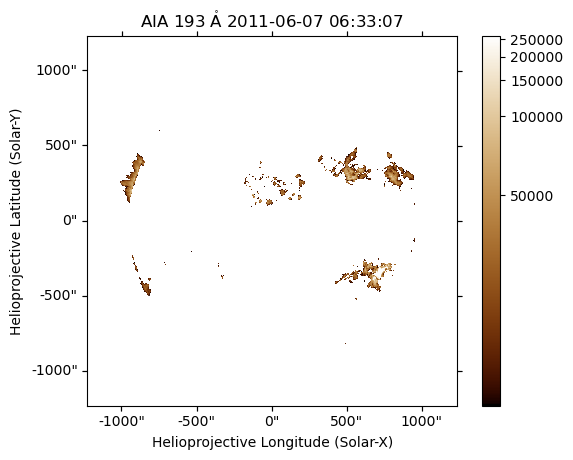

In [4]:
aiamap_mask.mask = mask

fig = plt.figure()
ax = fig.add_subplot(projection=aiamap_mask)
aiamap_mask.plot(axes=ax)
plt.colorbar()

plt.show()


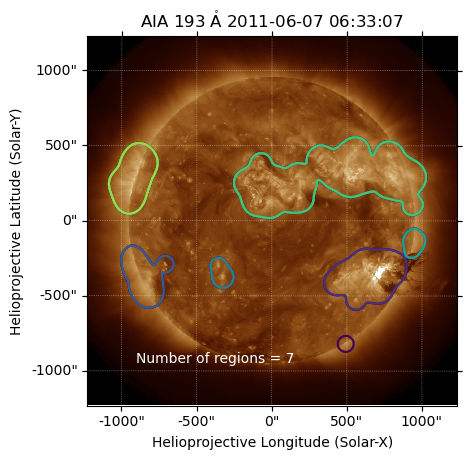

In [5]:
data2 = ndimage.gaussian_filter(aiamap.data * ~mask, 14)
data2[data2 < 100] = 0

##############################################################################
# Now we will make a second sunpy map with this smoothed data.

aiamap2 = sunpy.map.Map(data2, aiamap.meta)

##############################################################################
# The function `scipy.ndimage.label` counts the number of contiguous regions
# in an image.
labels, n = ndimage.label(aiamap2.data)

##############################################################################
# Finally, we plot the smoothed bright image data, along with the estimate of
# the number of distinct regions. We can see that approximately 6 distinct hot
# regions are present above the 10% of the maximum level.

fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax)
ax.contour(labels)
plt.figtext(0.3, 0.2, f'Number of regions = {n}', color='white')

plt.show()
